AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [5]:
import pandas as pd
df = pd.read_csv('titanic.csv')
print(df.head(10))
print(df.tail(20))
print(df.info)
print(df.describe)
print(df.describe().to_string)



   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6        0       3   
6            7        0       1   
7            8        0       3   
8            9        1       3   
9           10        1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0  

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             7
Cabin          687
Embarked         2
dtype: int64


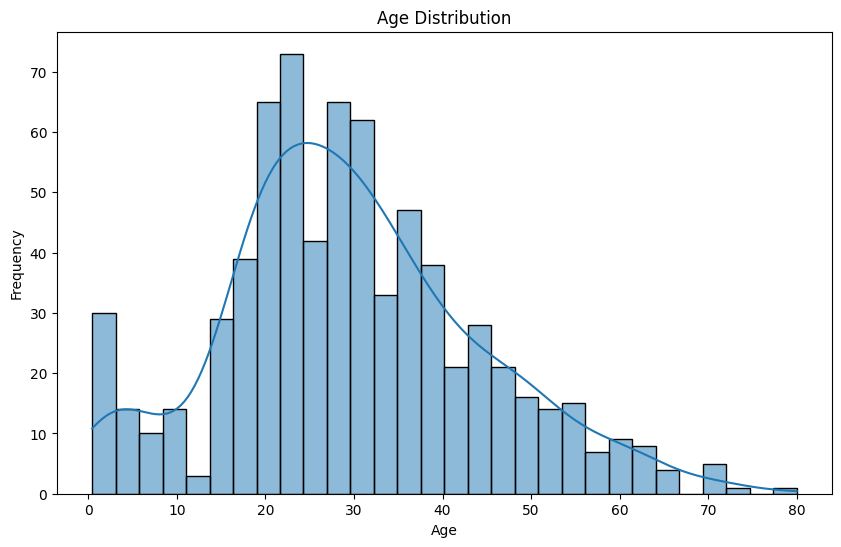

   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0         A/5 21171   7.2500  Unknown        S  
1      0          PC 17599  71.2833      C85        C  
2      0  STON/O2. 3101282   7.9250  Unknown        S  
3      0            113803  53.1000     C123        S  
4      0            373450   8.0500  Unknown  

In [29]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv('titanic.csv')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
print(df.isna().sum())

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)
df['Cabin'] = df['Cabin'].fillna('Unknown')

embarked_mode = df['Embarked'].mode()
if not embarked_mode.empty:
    df['Embarked'] = df['Embarked'].fillna(embarked_mode[0])
else:
    df['Embarked'] = df['Embarked'].fillna('Unknown')

df['Fare'] = df['Fare'].fillna(df['Fare'].median())
print(df.head())



AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

C:\Users\frona\AppData\Local\Temp\ipykernel_2708\4033287509.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_fare1.index, y=avg_fare1.values, palette="Blues_d")


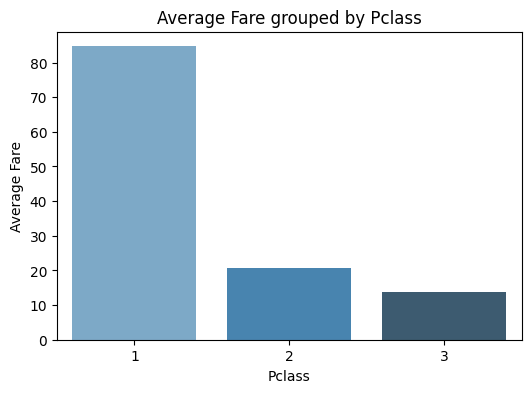

C:\Users\frona\AppData\Local\Temp\ipykernel_2708\4033287509.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_fare2.index, y=avg_fare2.values, palette="Blues_d")


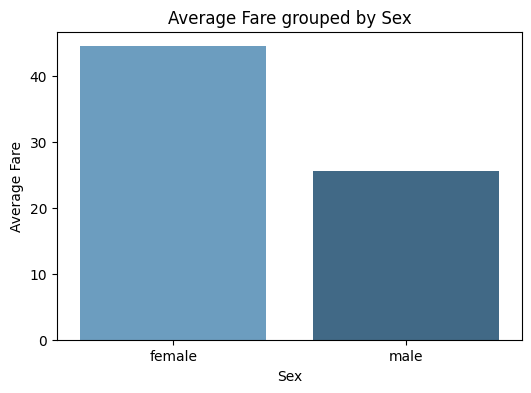

In [49]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('titanic.csv')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

avg_fare1 = df.groupby('Pclass')['Fare'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_fare1.index, y=avg_fare1.values, palette="Blues_d")
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.title('Average Fare grouped by Pclass')
plt.show()

avg_fare2 = df.groupby('Sex')['Fare'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_fare2.index, y=avg_fare2.values, palette="Blues_d")
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.title('Average Fare grouped by Sex')
plt.show()

AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

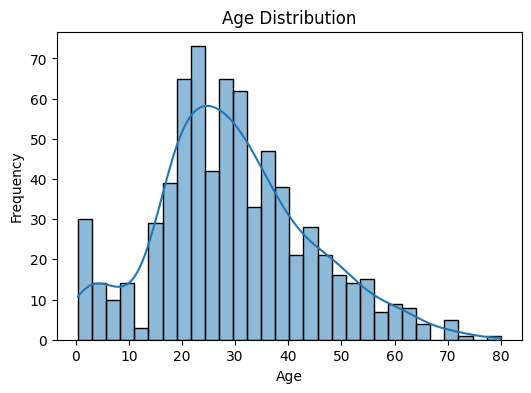

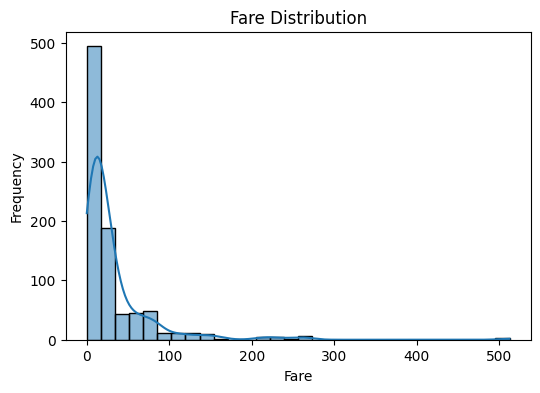

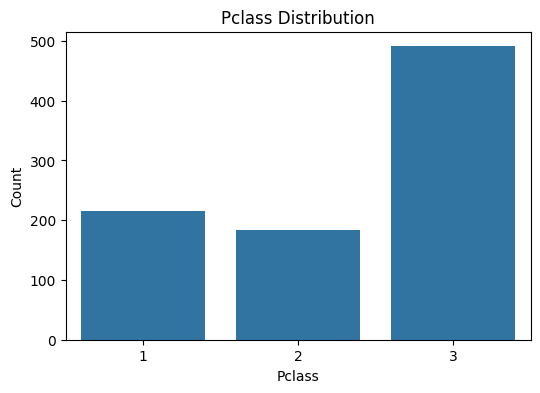

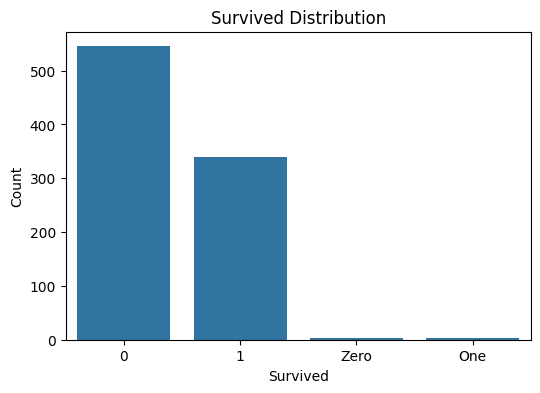

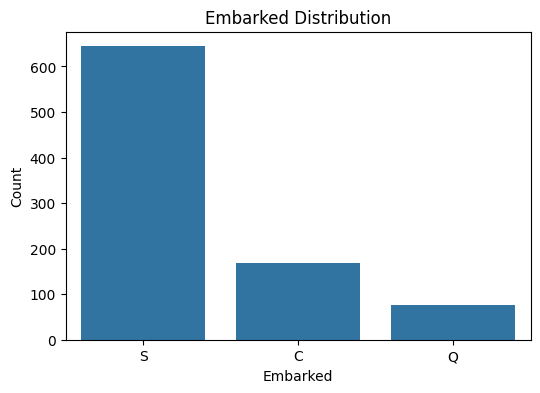

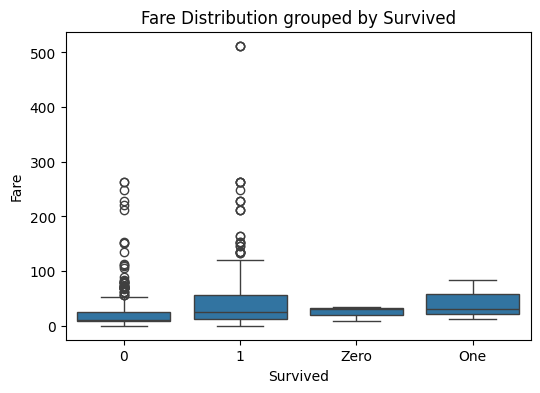

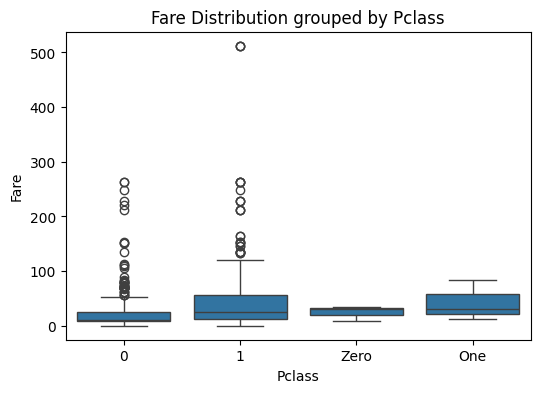

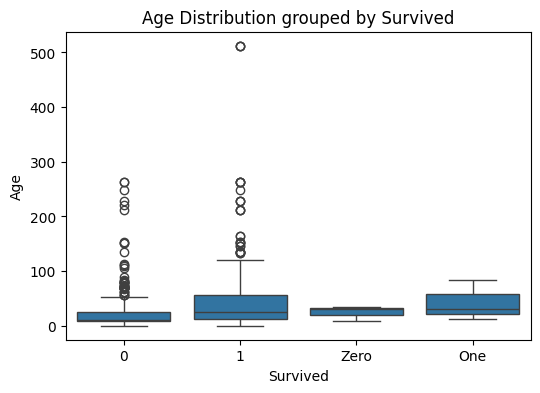

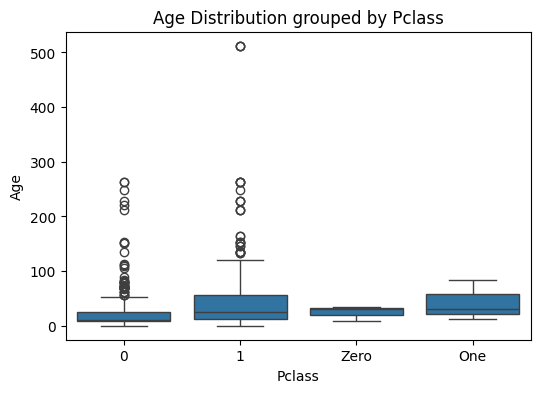

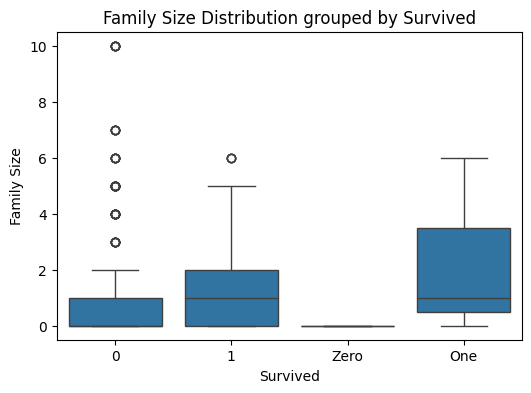

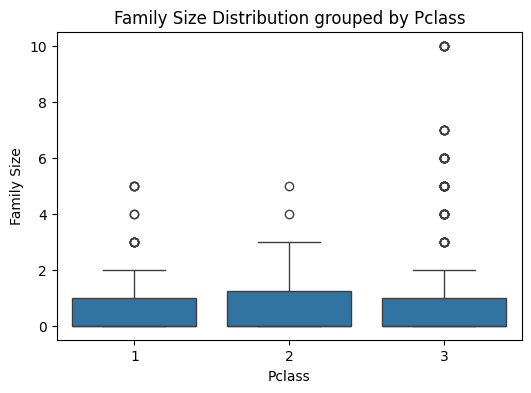

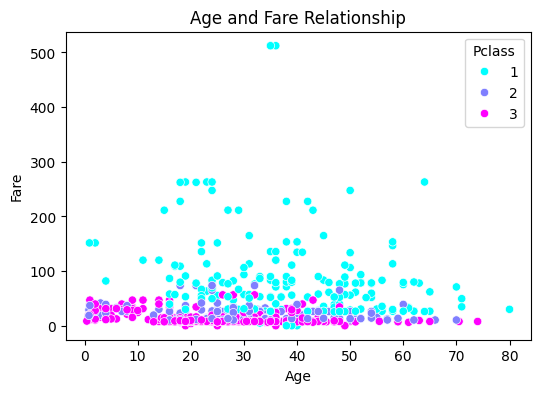

In [55]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv('titanic.csv')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

#Plot the distribution of 'Age' 
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Plot the distribution of 'Fare'
plt.figure(figsize=(6, 4))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

#Plot the distribution of 'Pclass'
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df)
plt.title('Pclass Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

#Plot the distribution of 'Survived'
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survived Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

#Plot the distribution of 'Embarked'
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

#Plot the distribution of 'Fare' grouped by 'Survived'
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution grouped by Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

#Plot the distribution of 'Fare' grouped by 'Pclass'
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution grouped by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

#Plot the distribution of 'Age' grouped by 'Survived'
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Age Distribution grouped by Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

#Plot the distribution of 'Age' grouped by 'PClass'
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Age Distribution grouped by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

#Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
df['Family_Size'] = df['SibSp'] + df['Parch']
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Family_Size', data=df)
plt.title('Family Size Distribution grouped by Survived')
plt.xlabel('Survived')
plt.ylabel('Family Size')
plt.show()

#Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Family_Size', data=df)
plt.title('Family Size Distribution grouped by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Family Size')
plt.show()

#Plot a distribution between 'Age' and 'Fare'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Pclass', palette='cool')
plt.title('Age and Fare Relationship')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()



AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')
correlation_matrix = df.select_dtypes(include=['number']).corr()
print( correlation_matrix)

             PassengerId    Pclass       Age     SibSp     Parch
PassengerId     1.000000 -0.035144  0.036847 -0.057527 -0.001652
Pclass         -0.035144  1.000000 -0.369226  0.083081  0.018443
Age             0.036847 -0.369226  1.000000 -0.308247 -0.189119
SibSp          -0.057527  0.083081 -0.308247  1.000000  0.414838
Parch          -0.001652  0.018443 -0.189119  0.414838  1.000000
